<h1 align='center'> Gradient Descent of Logistic Regression </h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,
                           n_redundant=0, n_classes=2, n_clusters_per_class=1, 
                           random_state=41,hypercube=False,class_sep=20)

### Data Visualization

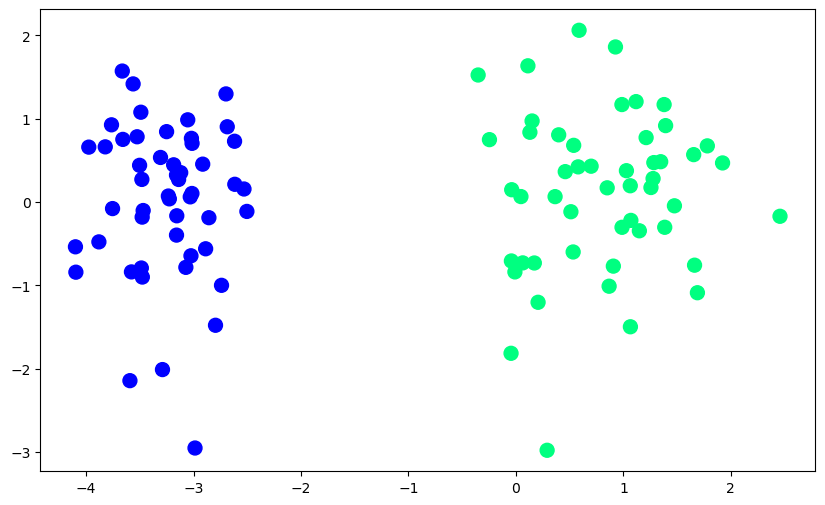

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

__solver{'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default=’lbfgs’__




- Algorithm to use in the optimization problem. Default is __'lbfgs'__. To choose a solver, you might want to consider the following aspects:



- For __small__ datasets, <code>'liblinear'</code> is a good choice, whereas <code>'sag'</code> and <code>'saga'</code> are faster for __large__ ones;



- For __multiclass__ problems, only <code>'newton-cg'</code>,  <code>'sag'</code>, <code>‘saga’</code>and <code>‘lbfgs’</code> handle multinomial loss;



- <code>‘liblinear’</code> is limited to __one-versus-rest__ schemes.



- <code>‘newton-cholesky’</code> is a good choice for <code>n_samples >> n_features </code>, especially with __one-hot encoded categorical__ features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.



__Warning__ The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:
- __‘lbfgs’__ - [‘l2’, None]

- __‘liblinear’__ - [‘l1’, ‘l2’]

- __‘newton-cg’__ - [‘l2’, None]

- __‘newton-cholesky’__ - [‘l2’, None]

- __‘sag’__ - [‘l2’, None]

- __‘saga’__ - [‘elasticnet’, ‘l1’, ‘l2’, None]

 

__Note__
- ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale.

In [10]:
logistic = LogisticRegression(penalty='none', solver='sag')
logistic.fit(X,y)

C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [11]:
print('Coefficent = ',logistic.coef_)
print('Intercept = ',logistic.intercept_)

Coefficent =  [[4.81097162 0.21172379]]
Intercept =  [5.78629831]


In [12]:
m1 = -(logistic.coef_[0][0]/logistic.coef_[0][1])
b1 = -(logistic.intercept_/logistic.coef_[0][1])

In [13]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

###  Custom Logistic Regression using Gradient Descent

In [14]:
def logistic_gradient(X,y):
    X= np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1]) #w=1
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        
        # Wnew = Wold + lr * 1/m(y-y_hat) * X
        weights = weights + lr * (np.dot((y-y_hat),X)/X.shape[0])
    
    return weights[1:], weights[0] #w,b

In [15]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [16]:
coef_, intercept_ =logistic_gradient(X,y)

In [17]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [18]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

### Logistic Vs Gradient Descent

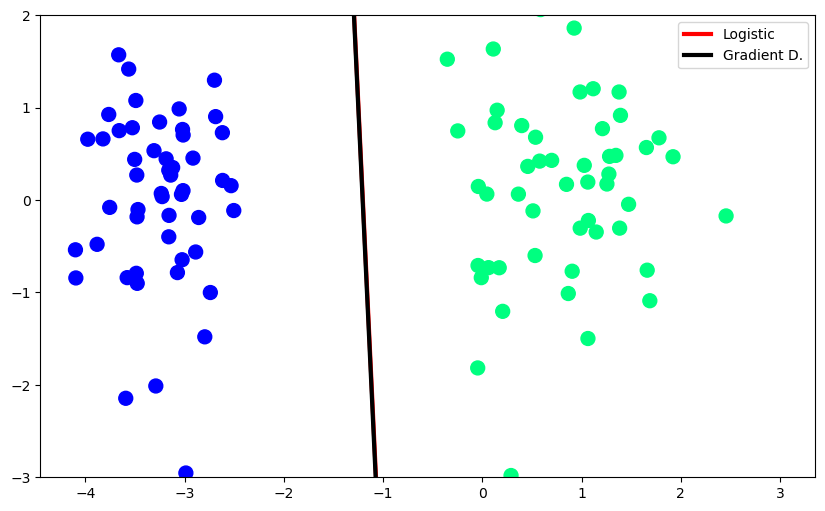

In [20]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3, label = 'Logistic')
plt.plot(x_input1,y_input1,color='black',linewidth=3, label='Gradient D.')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()
plt.show()